# Scikit-Image Processing

[Scikit-image](https://scikit-image.org) has a lot of interesting tools that you can use to manipulate data. I'm not too experienced with using scikit libraries so I've been imitating the general examples that they provide in their gallerys with some of the image files take from MorphoSource. 

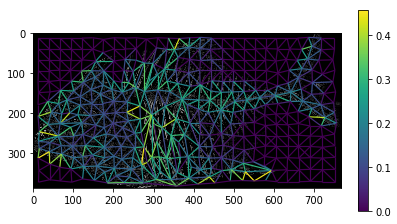

In [15]:
import skimage
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from skimage import data
from matplotlib import pyplot as plt


# Modeled after Scikit Image processing example for coffee
test = io.imread('Info2.jpg') #read file and turn into ndarray
gimgtest = color.rgb2gray(test) #computing luminance of RGB image

# segments image using k-means clustering 
labels = segmentation.slic(test, compactness=30, n_segments=400)
edges = filters.sobel(gimgtest)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2)

plt.colorbar(lc, fraction =0.03) #creates the color bar shown on the right
io.show()

Note: This is the SF piranha fish we were working with for the last few weeks. 

Since I'm personally not too familiar with the Scikit-image processing library right now, I'm going to use this opportunity to both clarify the code I've written (which was modeled after the introductory examples provided on the website), and familarize myself with the API modules in scikit-image. 

Also, I'd admit that my variable names are not the most descriptive/informative, but to spare my already-limited computer storage from having to shoulder extraneous files as I re-download more data, I will be sticking with the fish data for the next few examples. Once, I'm more comfortable with the library, I will be switching over to primate tooth image data from MorphoSource (found [here](https://www.morphosource.org/Detail/ProjectDetail/Show/project_id/194)).

Most of these examples are mainly for my own personal testing as I explore the functionalities available in scikit-image. Below is my attempt to re-interpret the code as accurately as I can. My descriptions are based on my understanding of the scikit-image documentation, user-guide, and other sources I've read online. 

1. In the first part of code, I'm bascially reading in the file "Info2.jpg", and turning that into a numpy.ndarray, which is what scikit-image uses to process/manipulate image data. 

2. Next, I'm simply computing the luminance (or brightness) of the RGB image

3. In the third line of code, I'm segmenting the image data. The parameter "compactness" indicates the balance between color and space. That is, the higher the compactness value, the more "square" the segmented regions become. The "n_segments" parameter indicates the approximate number of labels (integers marking each pixel, and from my understanding zero-labeled pixels are unlabeled and negative labels indicate unused pixels) in the segmented output. 

4. The fourth line is basically converting our 2d array into a Sobel edge map 2d array to create an image with edges. The Sobel operator is an operation used in image processing to aid edge detection.

5. Then, we create an RGB representation of the gray-level image using "gray2rgb"

6. In the 6th line, we create the RAG or region adjacency graph based on the labels/segmentations and edge maps we computed above

7. Lastly, we take the RAG graph and actually display it in the last three lines. We've also created a color bar on the side to show the intensity/color of the edges on the fish image.


Basically, what's happening is that we've segmented the fish image into regions/boundaries (i.e. RAG or region adajency graph). And the colors of the edges/boundaries correspond to the average value of the shared pixels along the boundaries. You can read more about the documentation [here](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_rag_boundary.html#sphx-glr-download-auto-examples-segmentation-plot-rag-boundary-py)